# 2.5 Image Augmentation Tutorial
By Zac Todd

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGES_DIR = f"{os.getcwd()}/resources"

Loading base image

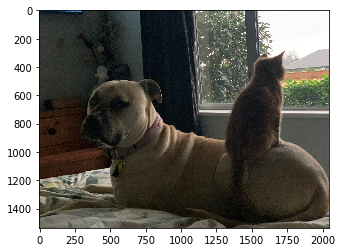

In [42]:
image = plt.imread(f"{IMAGES_DIR}/cat_on_dog.jpg")
plt.imshow(image)
plt.show()

### Flipping

In [ ]:
# Vectical Flipping
vflip_image = cv2.flip(image, 1)
plt.imshow(vflip_image)
plt.title("Vectical Flip")
plt.show()


# Horizonal Flipping
hflip_image = cv2.flip(image, 0)
plt.imshow(hflip_image)
plt.title("Horizonal Flip")
plt.show()


# Both
hvflip_image = cv2.flip(image, -1)
plt.imshow(hvflip_image)
plt.title("Horizonal and Vetical Flip")
plt.show()

### Translation

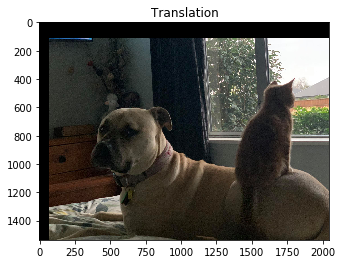

In [44]:
h, w, *_ = image.shape

t_matrix = np.float32([[1, 0, 70], [0, 1, 110]])
t_image = cv2.warpAffine(image, t_matrix, (w, h))

plt.imshow(t_image)
plt.title("Translation")
plt.show()

### Rotation

In [ ]:
# Some roations have flags like 90, 180 and 120 degrees.
r90_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(r90_image)
plt.title("90 Degree Rotation")
plt.show()


# Outerwise you have to select the where in the image you are rotating and the angle
def rotate(image, angle):
    rimage = image.copy()
    h, w, *_ = rimage.shape
    c = ((h - 1) / 2, (w - 1) / 2)
    m = cv2.getRotationMatrix2D(c, angle, 1)
    rimage = cv2.warpAffine(image, m, (w, h))
    return rimage

# Rotate by 35 degrees
r35_image = rotate(image, 35)
plt.imshow(r35_image)
plt.title("35 Degree Rotation")
plt.show()

### Random Rotations

In [ ]:
min_rotation = -20
max_rotation = 20

sample = 5

# Select from a value from a distibustion in this case unifrom from -20 to 20 degrees
for _ in range(sample):
    angle = np.random.uniform(min_rotation, max_rotation)
    rr_image = rotate(image, angle)
    plt.imshow(rr_image)
    plt.title(f"{angle:.2f} Degree Rotation")
    plt.show()


### Croping

In [ ]:
min_y = 200
max_y = 1000
min_x = 1300
max_x = 1800

cropped_image = image[min_y:max_y, min_x:max_x]
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.show()

Crop the image to focus on the dog.

In [ ]:
min_y = ...
max_y = ...
min_x = ...
max_x = ...

cropped_image = image[min_y:max_y, min_x:max_x]
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.show()

### Random Croping
Set up random cropping in s imlar way to how random rotation is etup.

In [ ]:
def random_crop(image, ...):
    ...
    crop_image = ...
    return crop_image

for _ in sample:
    crop_image = random_crop(image, ...)
    plt.imshow(crop_image)
    plt.title("")
    plt.show()

### Erasing

In [ ]:
# Erasing part of the image
min_y = 200
max_y = 1000
min_x = 1300
max_x = 1800

erase_image = image.copy()
erase_image[min_y:max_y, min_x:max_x] = (255, 255, 255)

plt.imshow(erase_image)
plt.title("Erase Image")
plt.show()


# Erasing part of the image and add noise
noise_erase_image = image.copy()
noisy = np.random.randint(0, 255, (max_y - min_y, max_x - min_x, 3))
noise_erase_image[min_y:max_y, min_x:max_x] = noisy

plt.imshow(noise_erase_image)
plt.title("Erase with Noise Image")
plt.show()

### Random Erasing
Setup random Erasing Simlarly to how you setup radnom croping.

In [ ]:
def random_erasing(image, ...):
    ...
    erase_image = ...
    return erase_image

for _ in sample:
    erase_image = random_erasing(image, ...)
    plt.imshow(erase_image)
    plt.title("")
    plt.show()

### Noise Injection

In [ ]:
# Gaussian Noise
mean = 0
var = 0.1
sigma = var ** 0.5
gauss = np.random.normal(mean,sigma, image.shape)
noisy = (image + gauss) / 255

plt.imshow(gauss)
plt.title("Gaussian Noise")
plt.show()

plt.imshow(noisy)
plt.title("Image with Gaussian Noise")
plt.show()

Search and implement speckle noise and plot the new image and the noise.

In [ ]:
...

plt.imshow(noisy)
plt.title("Speckle Noise")
plt.show()

plt.imshow(image_with_noise)
plt.title("Image with Speckle Noise")
plt.show()

Search an implement salt and pepper noise and plot the new image and the noise.

In [ ]:
...

plt.imshow(noisy)
plt.title("Salt and Pepper Noise")
plt.show()

plt.imshow(image_with_noise)
plt.title("Image with Salt and Pepper Noise")
plt.show()

### Colour Shifting

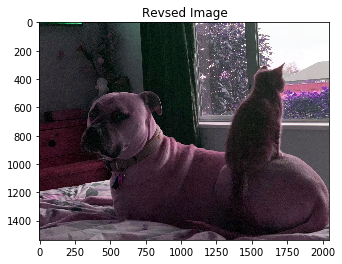

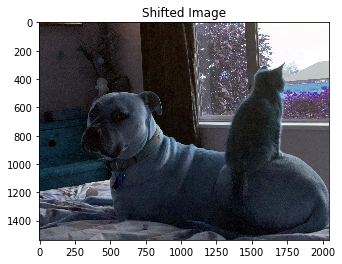

In [46]:
# Reversing the colors:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
rev_h = 180 - h
rev_hsv = cv2.merge([rev_h, s, v])
rev_image = cv2.cvtColor(rev_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(rev_image)
plt.title("Revsed Image")
plt.show()

# Shifting the colors:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
shift_h = (h + 90) % 180
shift_hsv = cv2.merge([shift_h, s, v])
shift_image = cv2.cvtColor(shift_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(shift_image)
plt.title("Shifted Image")
plt.show()